## Import packages

In [54]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from  statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load Dataframe

In [55]:
df = pd.read_parquet("../data/processed/gold_macro_combined.parquet")
df.head()

,Gold,USD_Index,EUR_USD,SP_500,Oil,Bitcoin,Vix,CPI,Unemployment_Rate,GPD,US_Interest_Rate,Zinsen,Gold_ETFs,M2_Euro,M2_US,GPRD
Date,,,,,,,,,,,,,,,,
2010-01-01,1117.699951,77.529999,1.438994,1132.98999,81.510002,NaN,20.040001,216.687000,9.8,14764.610000,0.110000,0.110000,NaN,8.234925e+12,8478.0,200.210129
2010-01-02,1117.699951,77.529999,1.438994,1132.98999,81.510002,NaN,20.040001,216.688742,9.8,14767.005367,0.110645,0.110645,NaN,8.234151e+12,8479.6,110.146950
2010-01-03,1117.699951,77.529999,1.438994,1132.98999,81.510002,NaN,20.040001,216.690484,9.8,14769.400733,0.111290,0.111290,NaN,8.233376e+12,8481.2,91.471298
2010-01-04,1117.699951,77.529999,1.442398,1132.98999,81.510002,NaN,20.040001,216.692226,9.8,14771.796100,0.111935,0.111935,24.59,8.232602e+12,8482.8,177.117065
2010-01-05,1118.099976,77.620003,1.436596,1136.52002,81.769997,NaN,19.350000,216.693968,9.8,14774.191467,0.112581,0.112581,23.34,8.231827e+12,8484.4,122.525620


In [56]:
df.tail()

,Gold,USD_Index,EUR_USD,SP_500,Oil,Bitcoin,Vix,CPI,Unemployment_Rate,GPD,US_Interest_Rate,Zinsen,Gold_ETFs,M2_Euro,M2_US,GPRD
Date,,,,,,,,,,,,,,,,
2025-06-18,3389.800049,98.910004,1.148264,5980.870117,75.139999,104883.328125,20.139999,321.465,4.1,29962.047,4.33,4.33,19.580,1.087614e+13,21942.0,203.60936
2025-06-19,3389.800049,98.910004,1.147750,5980.870117,75.139999,104684.289062,20.139999,321.465,4.1,29962.047,4.33,4.33,19.425,1.087614e+13,21942.0,203.60936
2025-06-20,3368.100098,98.709999,1.151278,5967.839844,74.930000,103309.601562,20.620001,321.465,4.1,29962.047,4.33,4.33,19.270,1.087614e+13,21942.0,203.60936
2025-06-21,3368.100098,98.709999,1.151278,5967.839844,74.930000,102257.406250,20.620001,321.465,4.1,29962.047,4.33,4.33,19.270,1.087614e+13,21942.0,203.60936
2025-06-22,3368.100098,98.709999,1.151278,5967.839844,74.930000,102257.406250,20.620001,321.465,4.1,29962.047,4.33,4.33,19.270,1.087614e+13,21942.0,203.60936


### Overview of the DataFrame

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5652 entries, 2010-01-01 to 2025-06-22
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gold               5652 non-null   float64
 1   USD_Index          5652 non-null   float64
 2   EUR_USD            5652 non-null   float64
 3   SP_500             5652 non-null   float64
 4   Oil                5652 non-null   float64
 5   Bitcoin            3932 non-null   float64
 6   Vix                5652 non-null   float64
 7   CPI                5652 non-null   float64
 8   Unemployment_Rate  5652 non-null   float64
 9   GPD                5652 non-null   float64
 10  US_Interest_Rate   5652 non-null   float64
 11  Zinsen             5652 non-null   float64
 12  Gold_ETFs          5649 non-null   float64
 13  M2_Euro            5652 non-null   float64
 14  M2_US              5652 non-null   float64
 15  GPRD               5652 non-null   float64
dtypes: flo

###  Check for Missing Values

In [58]:
df.isnull().sum()

Gold                    0
USD_Index               0
EUR_USD                 0
SP_500                  0
Oil                     0
Bitcoin              1720
Vix                     0
CPI                     0
Unemployment_Rate       0
GPD                     0
US_Interest_Rate        0
Zinsen                  0
Gold_ETFs               3
M2_Euro                 0
M2_US                   0
GPRD                    0
dtype: int64

### Ensure Index is a Timestamp

In [59]:
df.index = pd.to_datetime(df.index)

You can see that the most missing values occur in the Bitcoin feature.
This is because Bitcoin did not exist during that time interval.

###  Fill Missing Numeric Continuous Values

In [60]:
df['Gold_ETFs'] = df['Gold_ETFs'].fillna(df['Gold_ETFs'].mean())
df['GPRD'] = df['GPRD'].fillna(df['GPRD'].mean())

### Data Availability Period

In [61]:
df[df['Bitcoin'].notna()].head(1)

,Gold,USD_Index,EUR_USD,SP_500,Oil,Bitcoin,Vix,CPI,Unemployment_Rate,GPD,US_Interest_Rate,Zinsen,Gold_ETFs,M2_Euro,M2_US,GPRD
Date,,,,,,,,,,,,,,,,
2014-09-17,1234.400024,84.699997,1.295908,2001.569946,94.419998,457.334015,12.65,237.712067,5.793333,17895.666891,0.09,0.09,17.14,9.487253e+12,11543.06,159.797913


### Check for Duplicates

In [62]:
df.duplicated().sum()

np.int64(1)

### Check Statistical Summary

In [63]:
df.describe()

,Gold,USD_Index,EUR_USD,SP_500,Oil,Bitcoin,Vix,CPI,Unemployment_Rate,GPD,US_Interest_Rate,Zinsen,Gold_ETFs,M2_Euro,M2_US,GPRD
count,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,3932.000000,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5.652000e+03,5652.000000,5652.000000
mean,1591.147204,92.547157,1.187190,2822.365126,71.872458,22928.553391,18.384917,256.440089,5.732343,20962.317322,1.336215,1.336215,17.198612,1.013985e+13,14874.927725,101.456237
std,435.620352,9.467838,0.113896,1354.328010,21.035976,26727.725521,6.919086,30.283269,2.180978,4546.916360,1.774043,1.774043,4.591442,9.485639e+11,4552.792589,49.830038
min,1050.800049,72.930000,0.959619,1022.580017,-37.630001,178.102997,9.140000,216.687000,3.400000,14764.610000,0.050000,0.050000,8.880000,8.209452e+12,8478.000000,0.000000
25%,1265.599976,82.339996,1.096578,1771.570007,53.799999,2174.952454,13.600000,233.830608,3.909677,17194.738633,0.095806,0.095806,14.235000,9.225846e+12,11010.482500,67.603424
50%,1480.850037,94.790001,1.145521,2477.700073,72.395000,9902.967285,16.660000,246.652613,4.919355,19995.213282,0.200000,0.200000,16.662500,1.087614e+13,13773.405000,92.770538
75%,1806.149994,99.252501,1.291322,3934.379883,88.910004,37179.493164,21.160000,273.764734,7.500000,24286.780073,2.060742,2.060742,19.450000,1.087614e+13,20694.146774,124.758101
max,3431.199951,114.110001,1.484406,6144.149902,123.699997,111673.281250,82.690002,321.465000,14.800000,29962.047000,5.330000,5.330000,48.980000,1.087614e+13,21942.000000,540.827393


1. Some features have very small values.

2. On the other hand, some features have very large values.

→ Therefore, the data must be scaled at the end to avoid bias during modeling.

3. Some values are also negative, such as the Oil Price feature.

### Data Range

In [64]:
df.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22'],
              dtype='datetime64[ns]', name='Date', length=5652, freq=None)

### Create New DataFrame Starting from Bitcoin Price Data

In [65]:
df = df[df.index >= '2014-09-17']

## Plotting Features

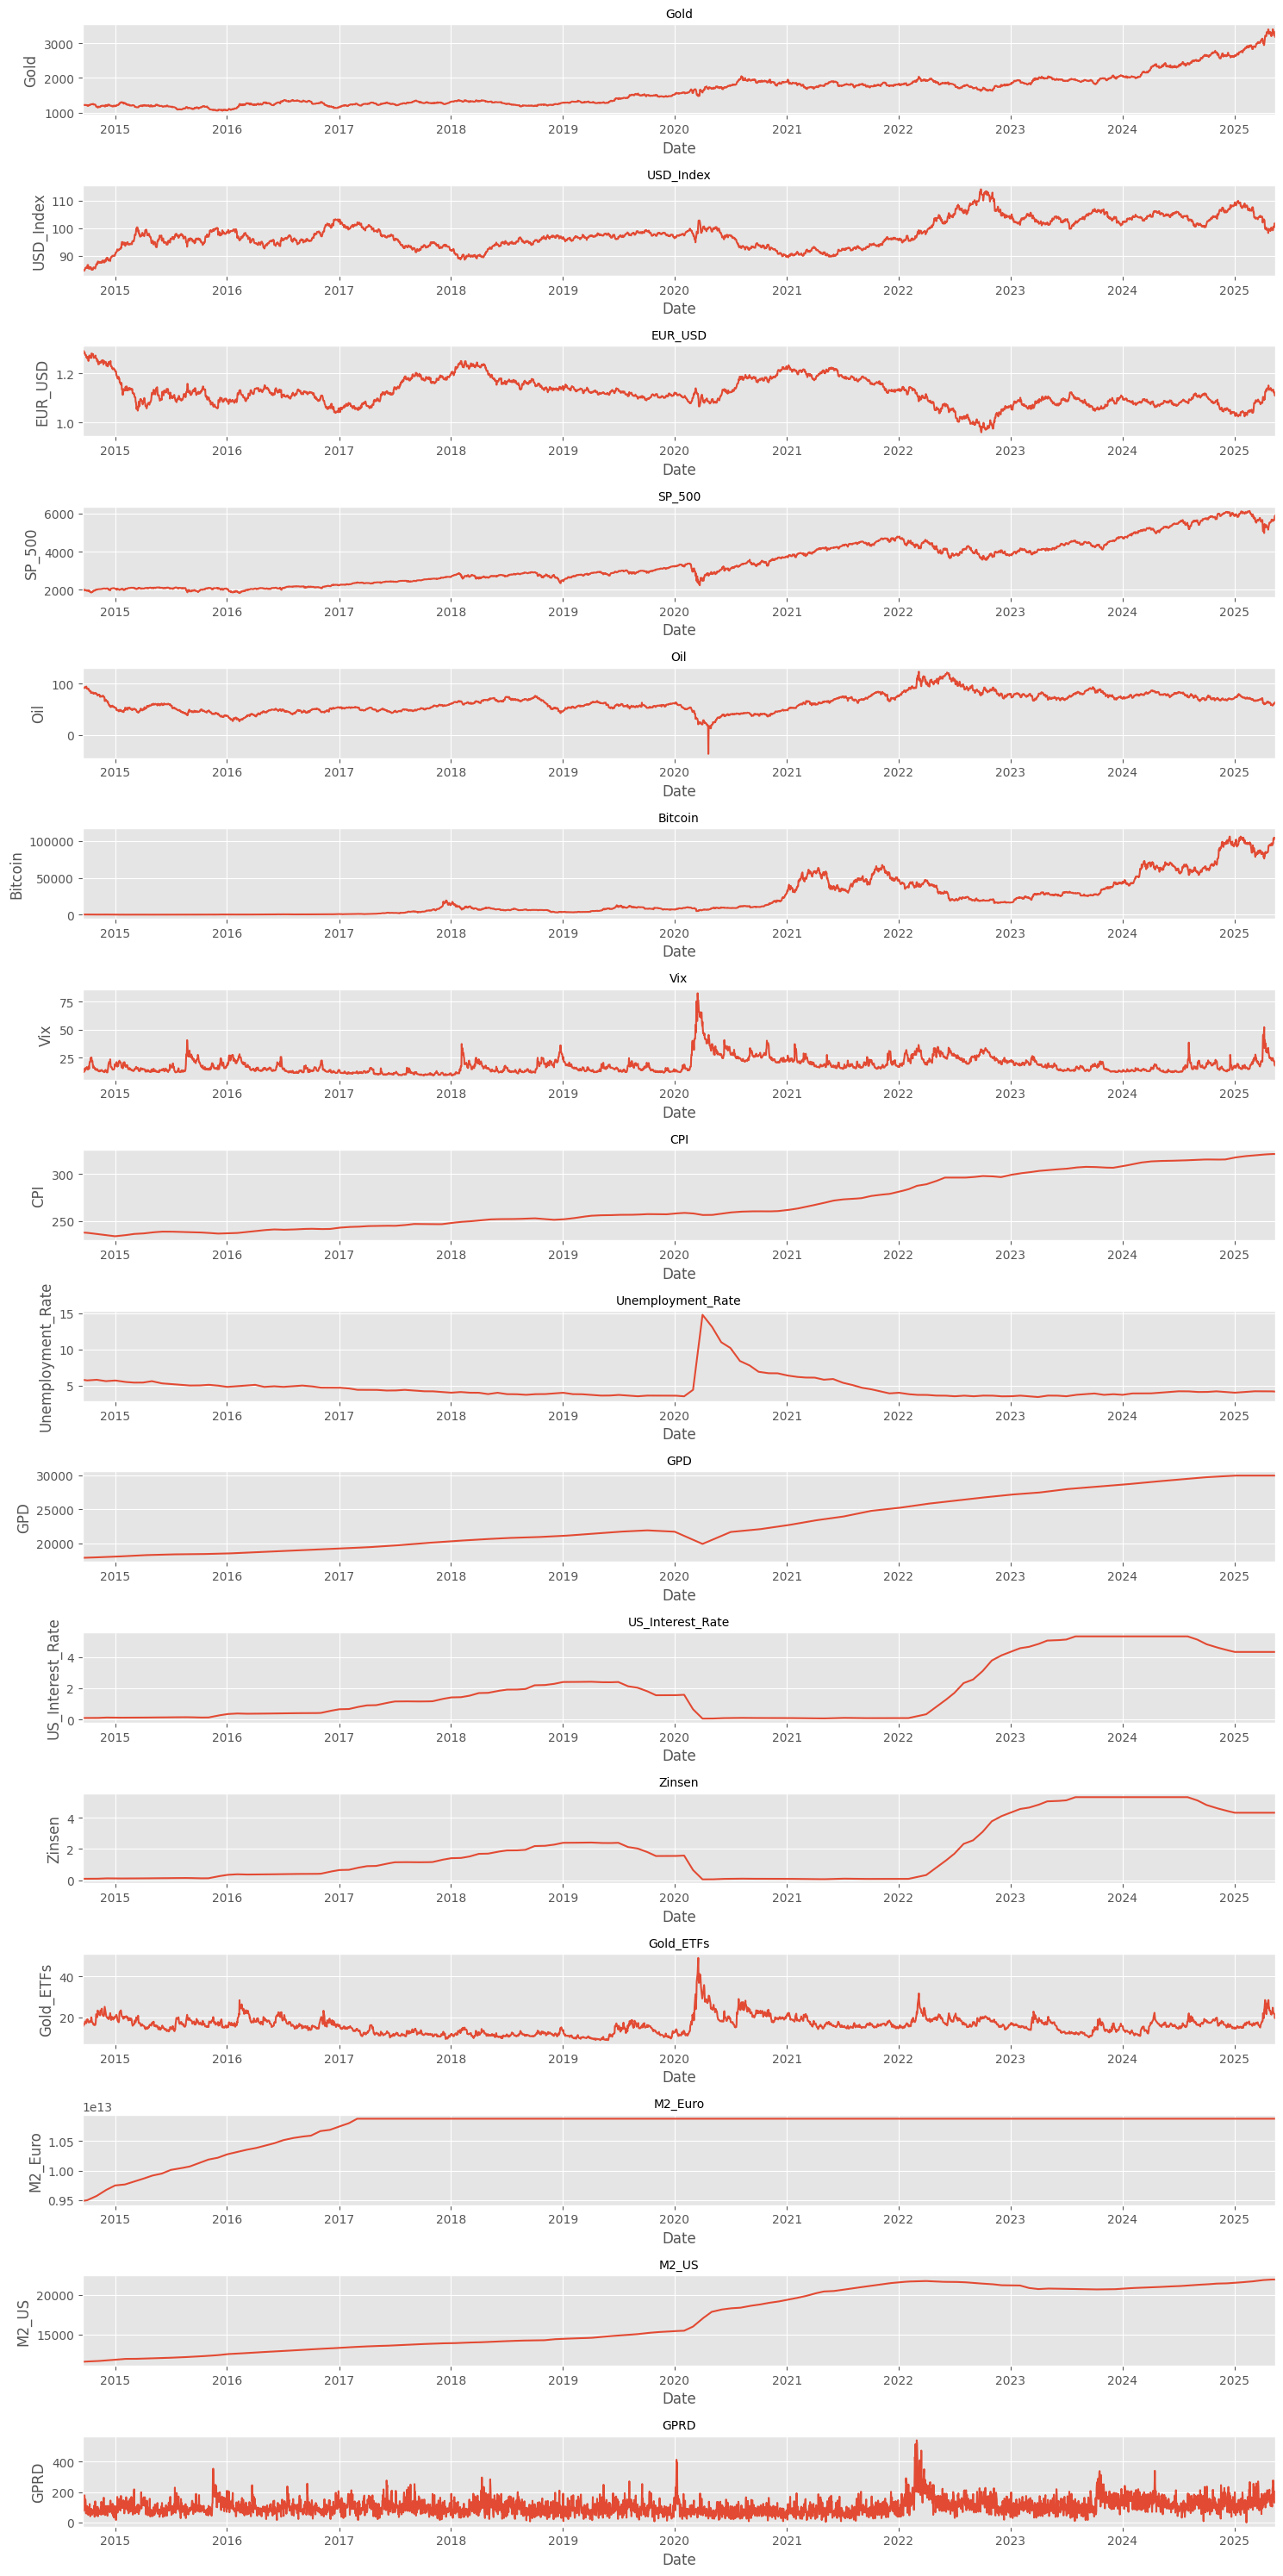

In [66]:
# 16 features means 16 plots
f, ax = plt.subplots(nrows=16, ncols=1, figsize=(15, 30))
plt.style.use('ggplot')  

for i, col in enumerate(df.columns[:16]):
    sns.lineplot(x=df.index, y=df[col], ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlim([date(2014, 9, 17), date(2025, 5, 14)])
  
plt.tight_layout()
plt.show()

### Monthly Resampling to Understand Trends

In [67]:
df_monthly = df.resample('M').mean()

### Plotting After Monthly Resampling to Understand Trends

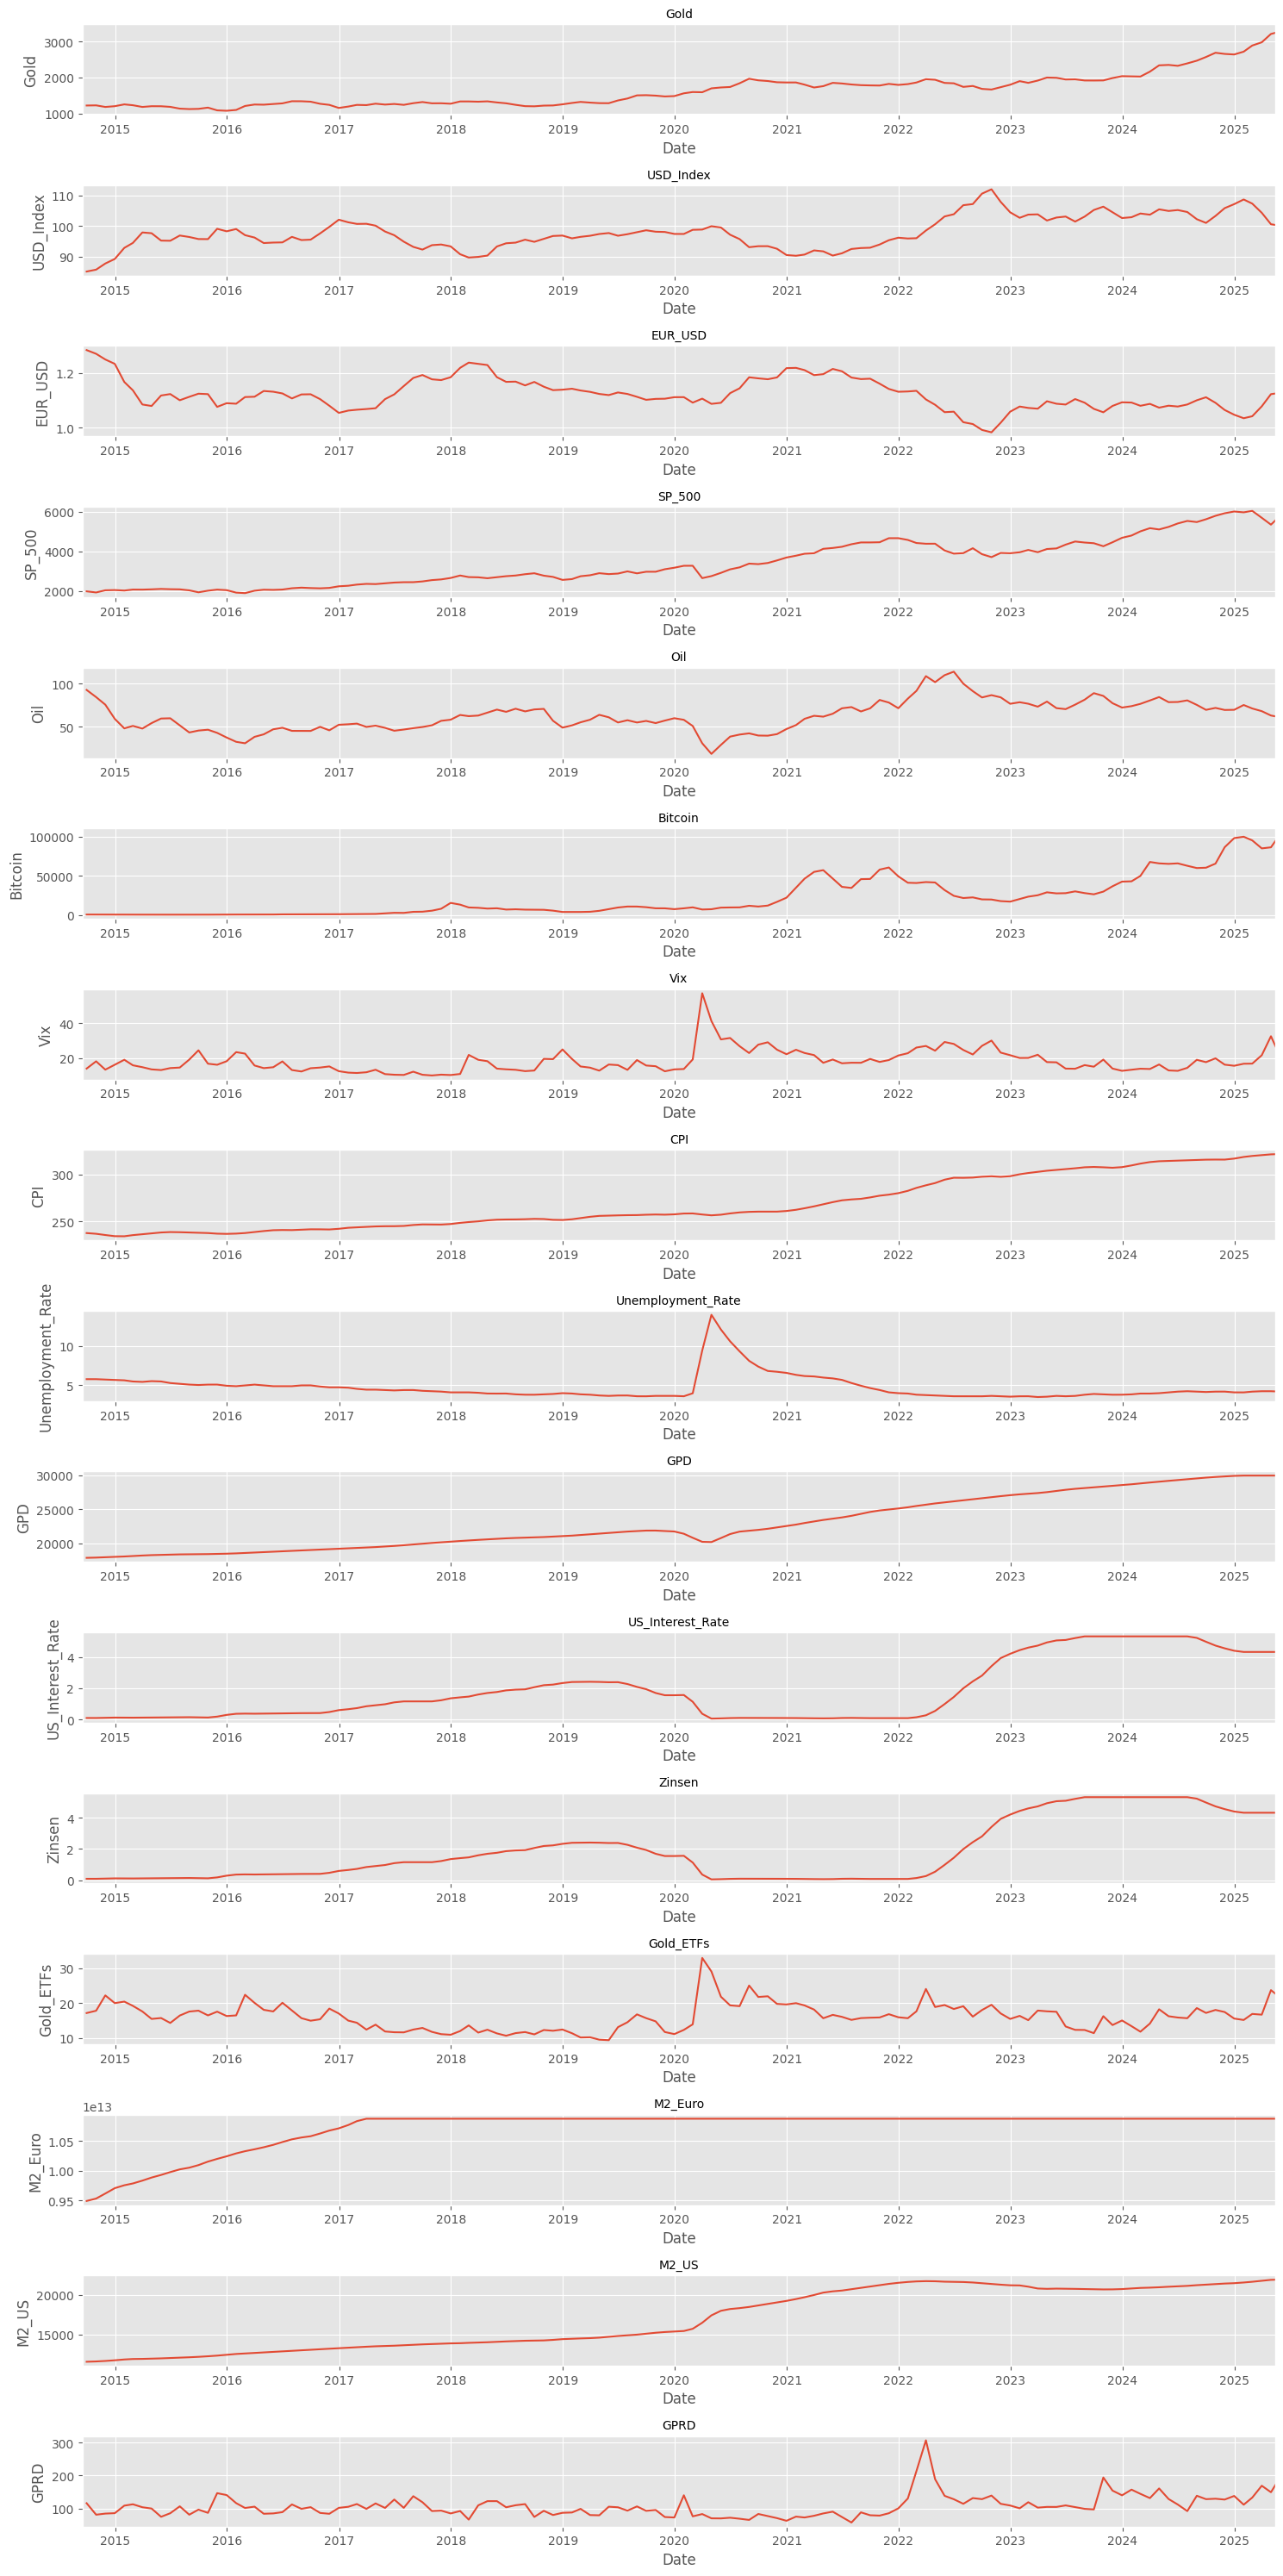

In [68]:
f, ax = plt.subplots(nrows=16, ncols=1, figsize=(15, 30))
plt.style.use('ggplot')  

for i, col in enumerate(df_monthly.columns[:16]):
    sns.lineplot(x=df_monthly.index, y=df_monthly[col], ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlim([date(2014, 9, 17), date(2025, 5, 14)])

plt.tight_layout()
plt.show()

### Visualizing the Distribution of Each Feature

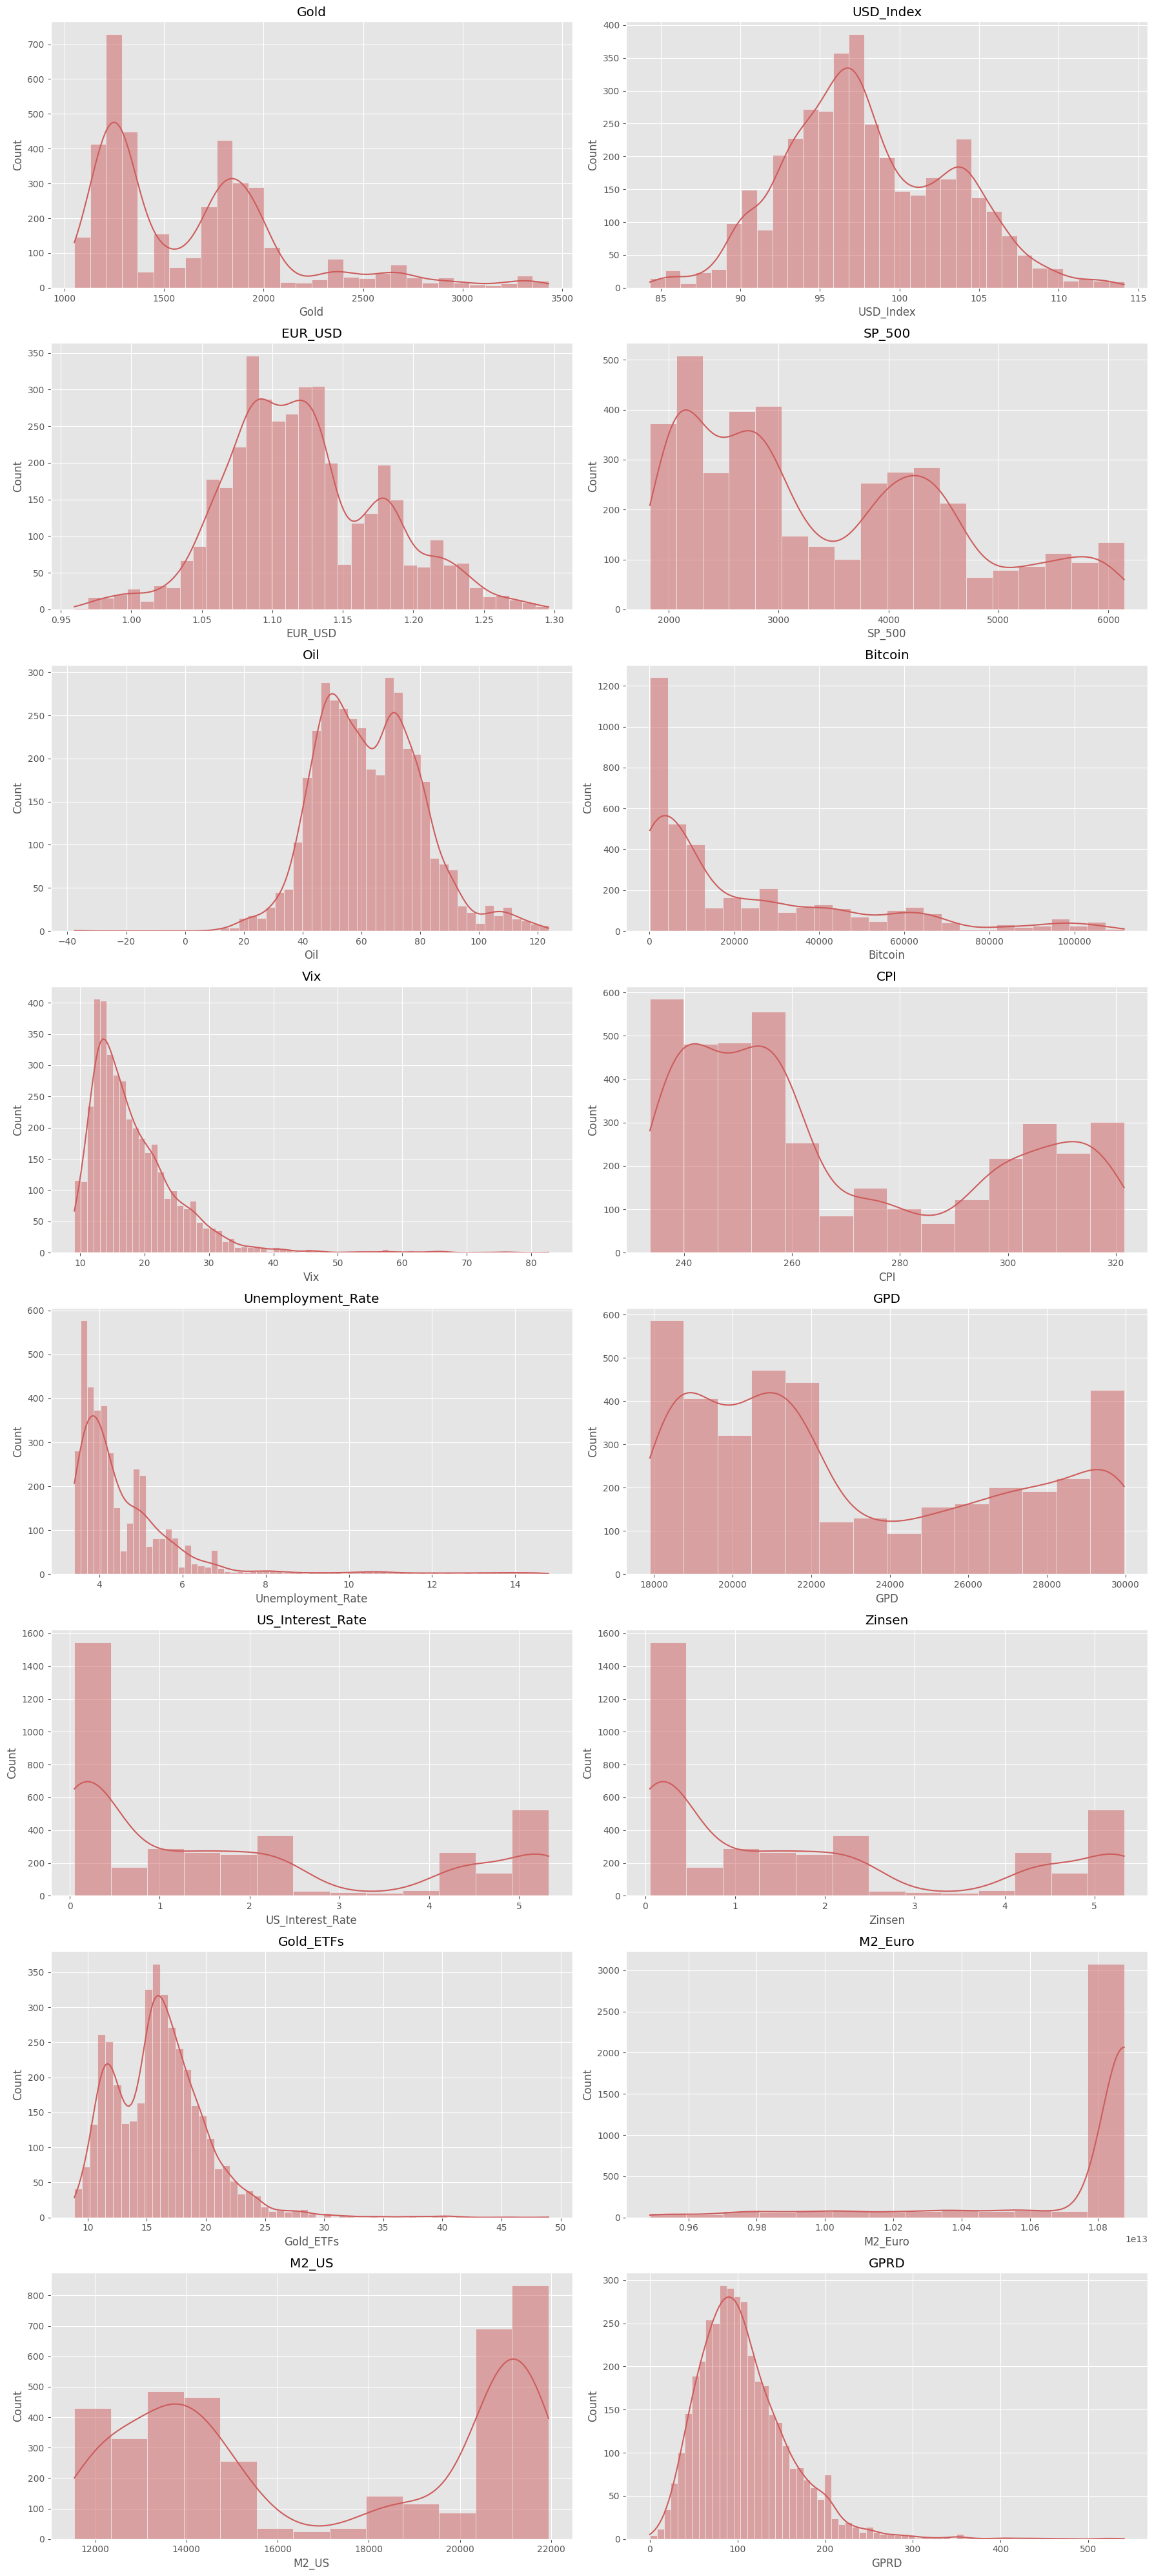

In [69]:
# To better understand the characteristics of our data, we examine the distribution of every feature.
features = df.columns
n_features = len(features)
ncols = 2
nrows = (n_features + 1) // ncols

# Create subplots
f, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (18, 5 * nrows))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(df[feature], ax=ax, kde=True,  color='indianred')
    ax.set_title(feature)
    
plt.tight_layout()
plt.show()

### Visual Check of Stationarity Using Rolling Statistics

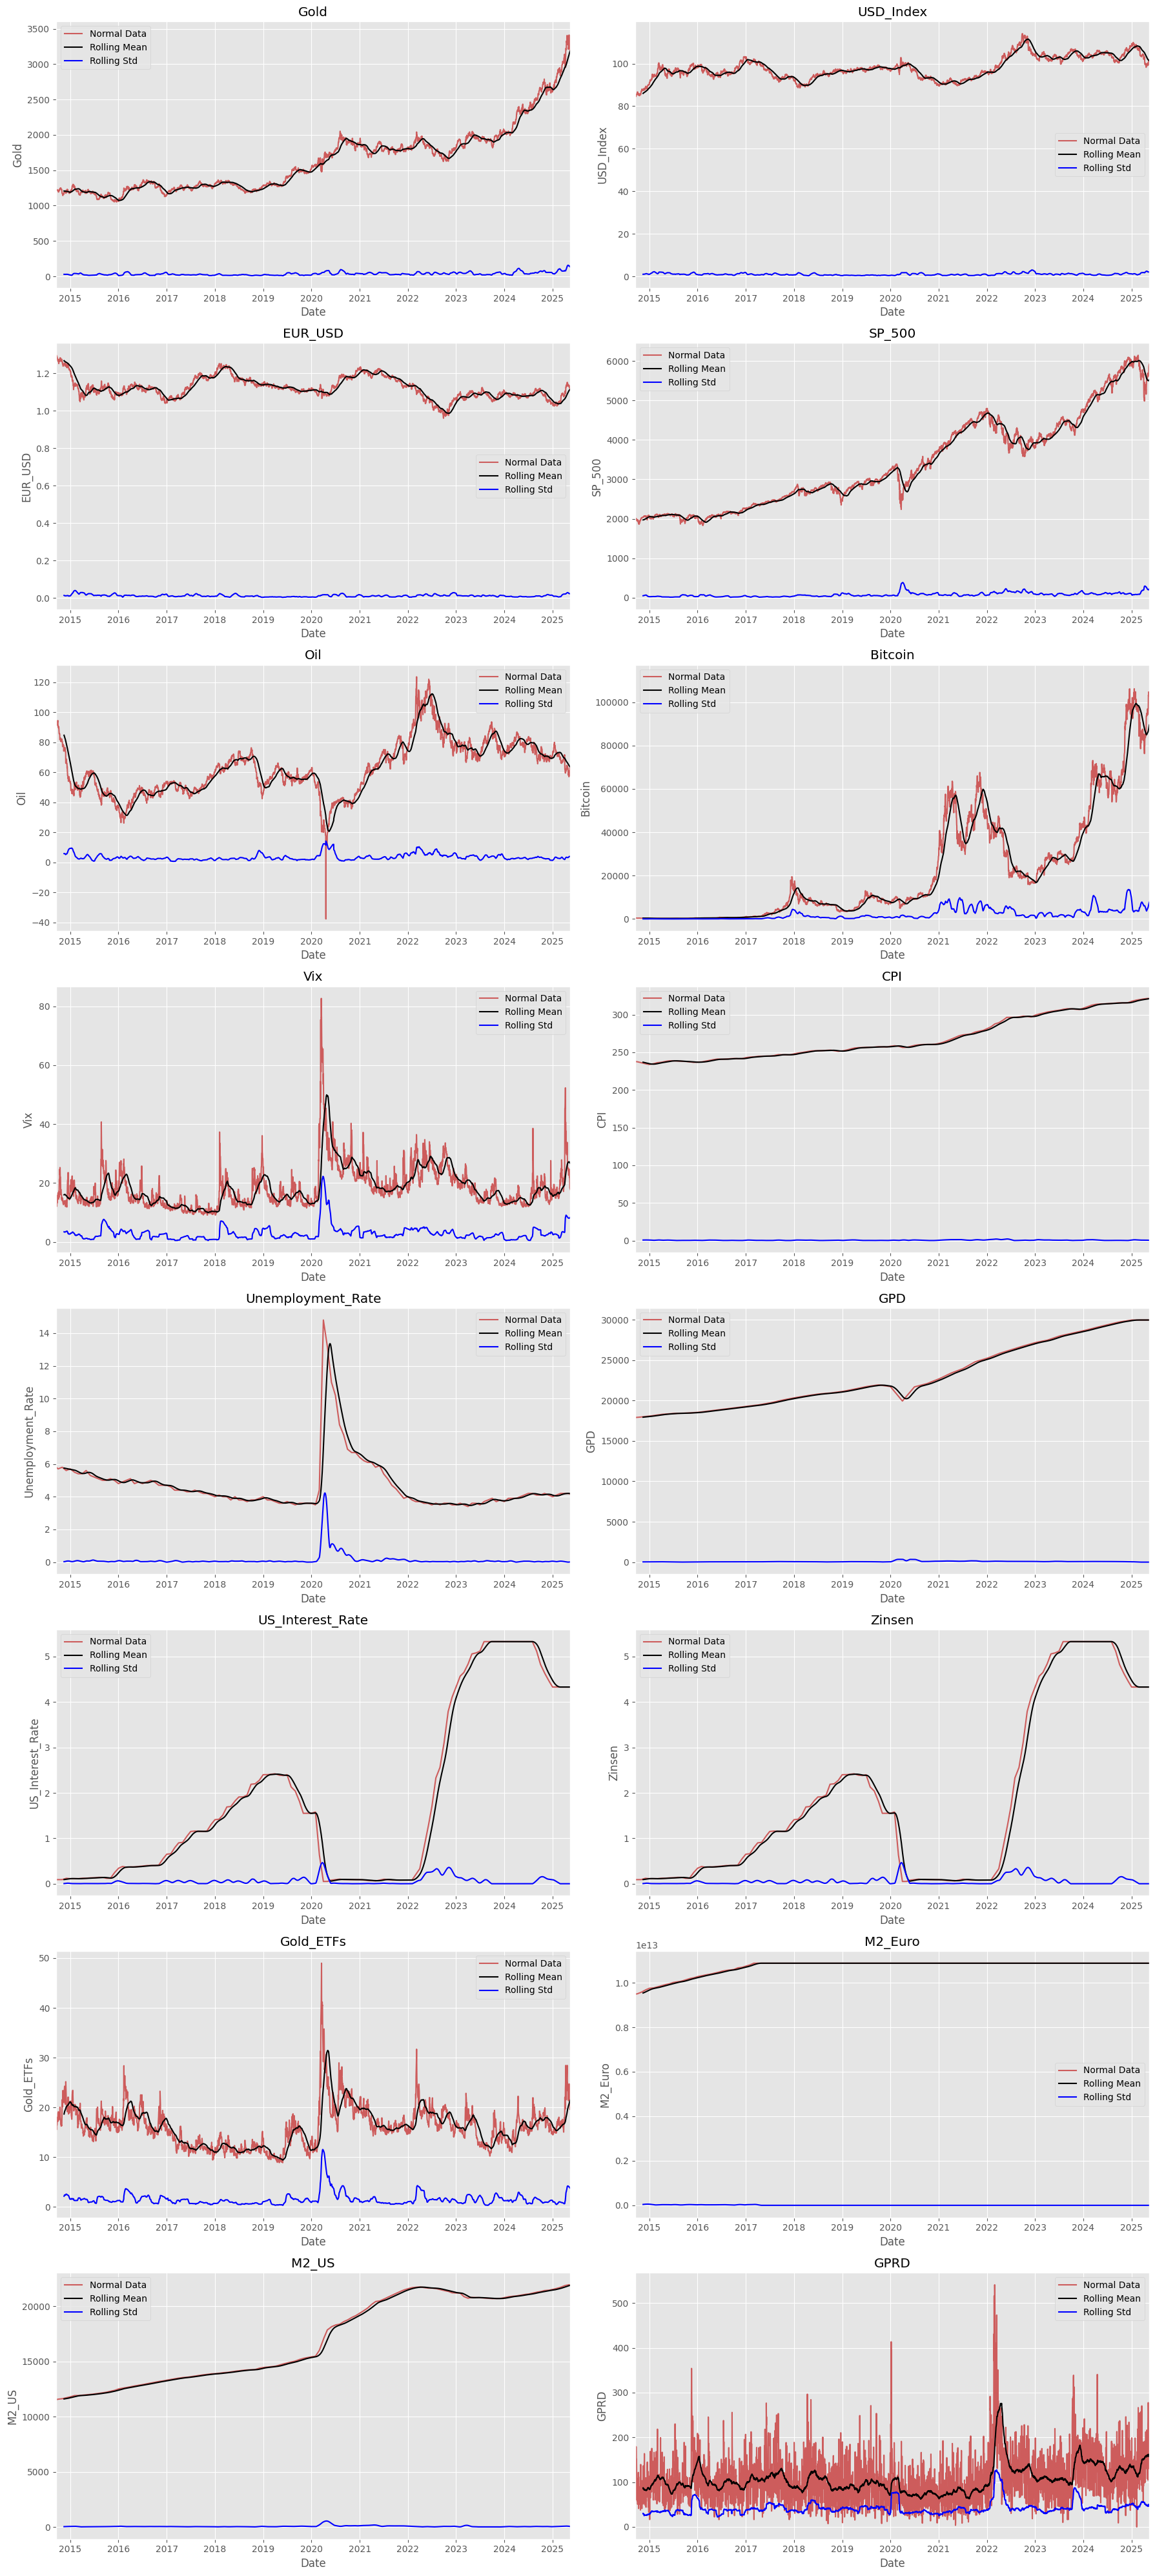

In [70]:
# Stationarity with random window size
rolling_window = 60
features = df.columns

# stationarity can also be checked visually without tests
n_features = len(features)
ncols = 2
nrows = (n_features + 1) // ncols

# Create subplots
f, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (18, 5 * nrows))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.lineplot(x=df.index, y=df[feature], ax=ax, color='indianred', label='Normal Data')
    sns.lineplot(x=df.index, y=df[feature].rolling(rolling_window).mean(), ax=ax, color='black', label='Rolling Mean')
    sns.lineplot(x=df.index, y=df[feature].rolling(rolling_window).std(), ax=ax, color='blue', label='Rolling Std')
    ax.set_title(feature)
    ax.set_xlim([date(2014, 9, 17), date(2025, 5, 14)])

plt.tight_layout()
plt.show()

So you can see that almost no feature is stationary.

Maybe M2 money supply a little bit

Nevertheless, you have to check this with the ADF test

### Testing Stationarity with the Augmented Dickey-Fuller (ADF) Test

In [71]:
# You can also check this with the ADF test
# Test null hypothesis by P value
def adf_test(series, feature_name):
    result = adfuller(series, autolag='AIC')
    p_value = result[1] # bei diesem Index findet man p Wert
    print(f"Feature: {feature_name}")
    print(f"ADF Statistics: {result[0]}")
    print(f"p-Value: {p_value}")
    if p_value < 0.05:
        print("-> Stationary\n")
    else:
        print('-> Non-Stationary\n')

# Perform test
for feature in df.columns:
    adf_test(df[feature], feature)

Feature: Gold
ADF Statistics: 3.043445147114975
p-Value: 1.0
-> Non-Stationary

Feature: USD_Index
ADF Statistics: -2.9265029396254505
p-Value: 0.04235173108258022
-> Stationary

Feature: EUR_USD
ADF Statistics: -3.5347963044338218
p-Value: 0.007137148951101983
-> Stationary

Feature: SP_500
ADF Statistics: 0.1649654572580465
p-Value: 0.9702267217372873
-> Non-Stationary

Feature: Oil
ADF Statistics: -2.5337692881290175
p-Value: 0.1074725657203574
-> Non-Stationary

Feature: Bitcoin
ADF Statistics: -0.2603972666166367
p-Value: 0.9309289975609685
-> Non-Stationary

Feature: Vix
ADF Statistics: -5.200054877145145
p-Value: 8.789815769121503e-06
-> Stationary

Feature: CPI
ADF Statistics: 0.7447894976215064
p-Value: 0.9906906177243298
-> Non-Stationary

Feature: Unemployment_Rate
ADF Statistics: -2.5176903791528042
p-Value: 0.11122918064318882
-> Non-Stationary

Feature: GPD
ADF Statistics: 0.07616482315446414
p-Value: 0.9643955703078445
-> Non-Stationary

Feature: US_Interest_Rate
ADF Sta

### Differencing as a Transformation Method to Achieve Stationarity

In [72]:
def adf_test(series):
    series = series.dropna()
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value < 0.05  

def make_stationary(df):
    df_stationary = df.copy()
    transformed_features = []
    
    for feature in df.columns:
        print(f"Testing feature: {feature}")
        is_stationary = adf_test(df[feature])
        
        if is_stationary:
            print(f" -> {feature} is stationary.")
        else:
            print(f" -> {feature} is NOT stationary. Differencing...")
            # Transformation method is differential
            df_stationary[feature] = df[feature].diff()
            transformed_features.append(feature)
            
            # Check whether this is still stationary
            if adf_test(df_stationary[feature]):
                print(f" -> {feature} is stationary AFTER differencing.")
            else:
                print(f" -> {feature} is STILL non-stationary after differencing.")
    
    # Remove NaN lines that are created by differentiation
    df_stationary = df_stationary.dropna()
    
    print("\nSummary:")
    print(f"Features differenced: {transformed_features}")
    
    return df_stationary

df_stationary = make_stationary(df)

Testing feature: Gold
 -> Gold is NOT stationary. Differencing...
 -> Gold is stationary AFTER differencing.
Testing feature: USD_Index
 -> USD_Index is stationary.
Testing feature: EUR_USD
 -> EUR_USD is stationary.
Testing feature: SP_500
 -> SP_500 is NOT stationary. Differencing...
 -> SP_500 is stationary AFTER differencing.
Testing feature: Oil
 -> Oil is NOT stationary. Differencing...
 -> Oil is stationary AFTER differencing.
Testing feature: Bitcoin
 -> Bitcoin is NOT stationary. Differencing...
 -> Bitcoin is stationary AFTER differencing.
Testing feature: Vix
 -> Vix is stationary.
Testing feature: CPI
 -> CPI is NOT stationary. Differencing...
 -> CPI is stationary AFTER differencing.
Testing feature: Unemployment_Rate
 -> Unemployment_Rate is NOT stationary. Differencing...
 -> Unemployment_Rate is stationary AFTER differencing.
Testing feature: GPD
 -> GPD is NOT stationary. Differencing...
 -> GPD is stationary AFTER differencing.
Testing feature: US_Interest_Rate
 -> US

Now df_stationary contains all features that are either stationary from the beginning or became stationary after differentiation, and is ready for modeling.

### Check correlation with correlation matrix

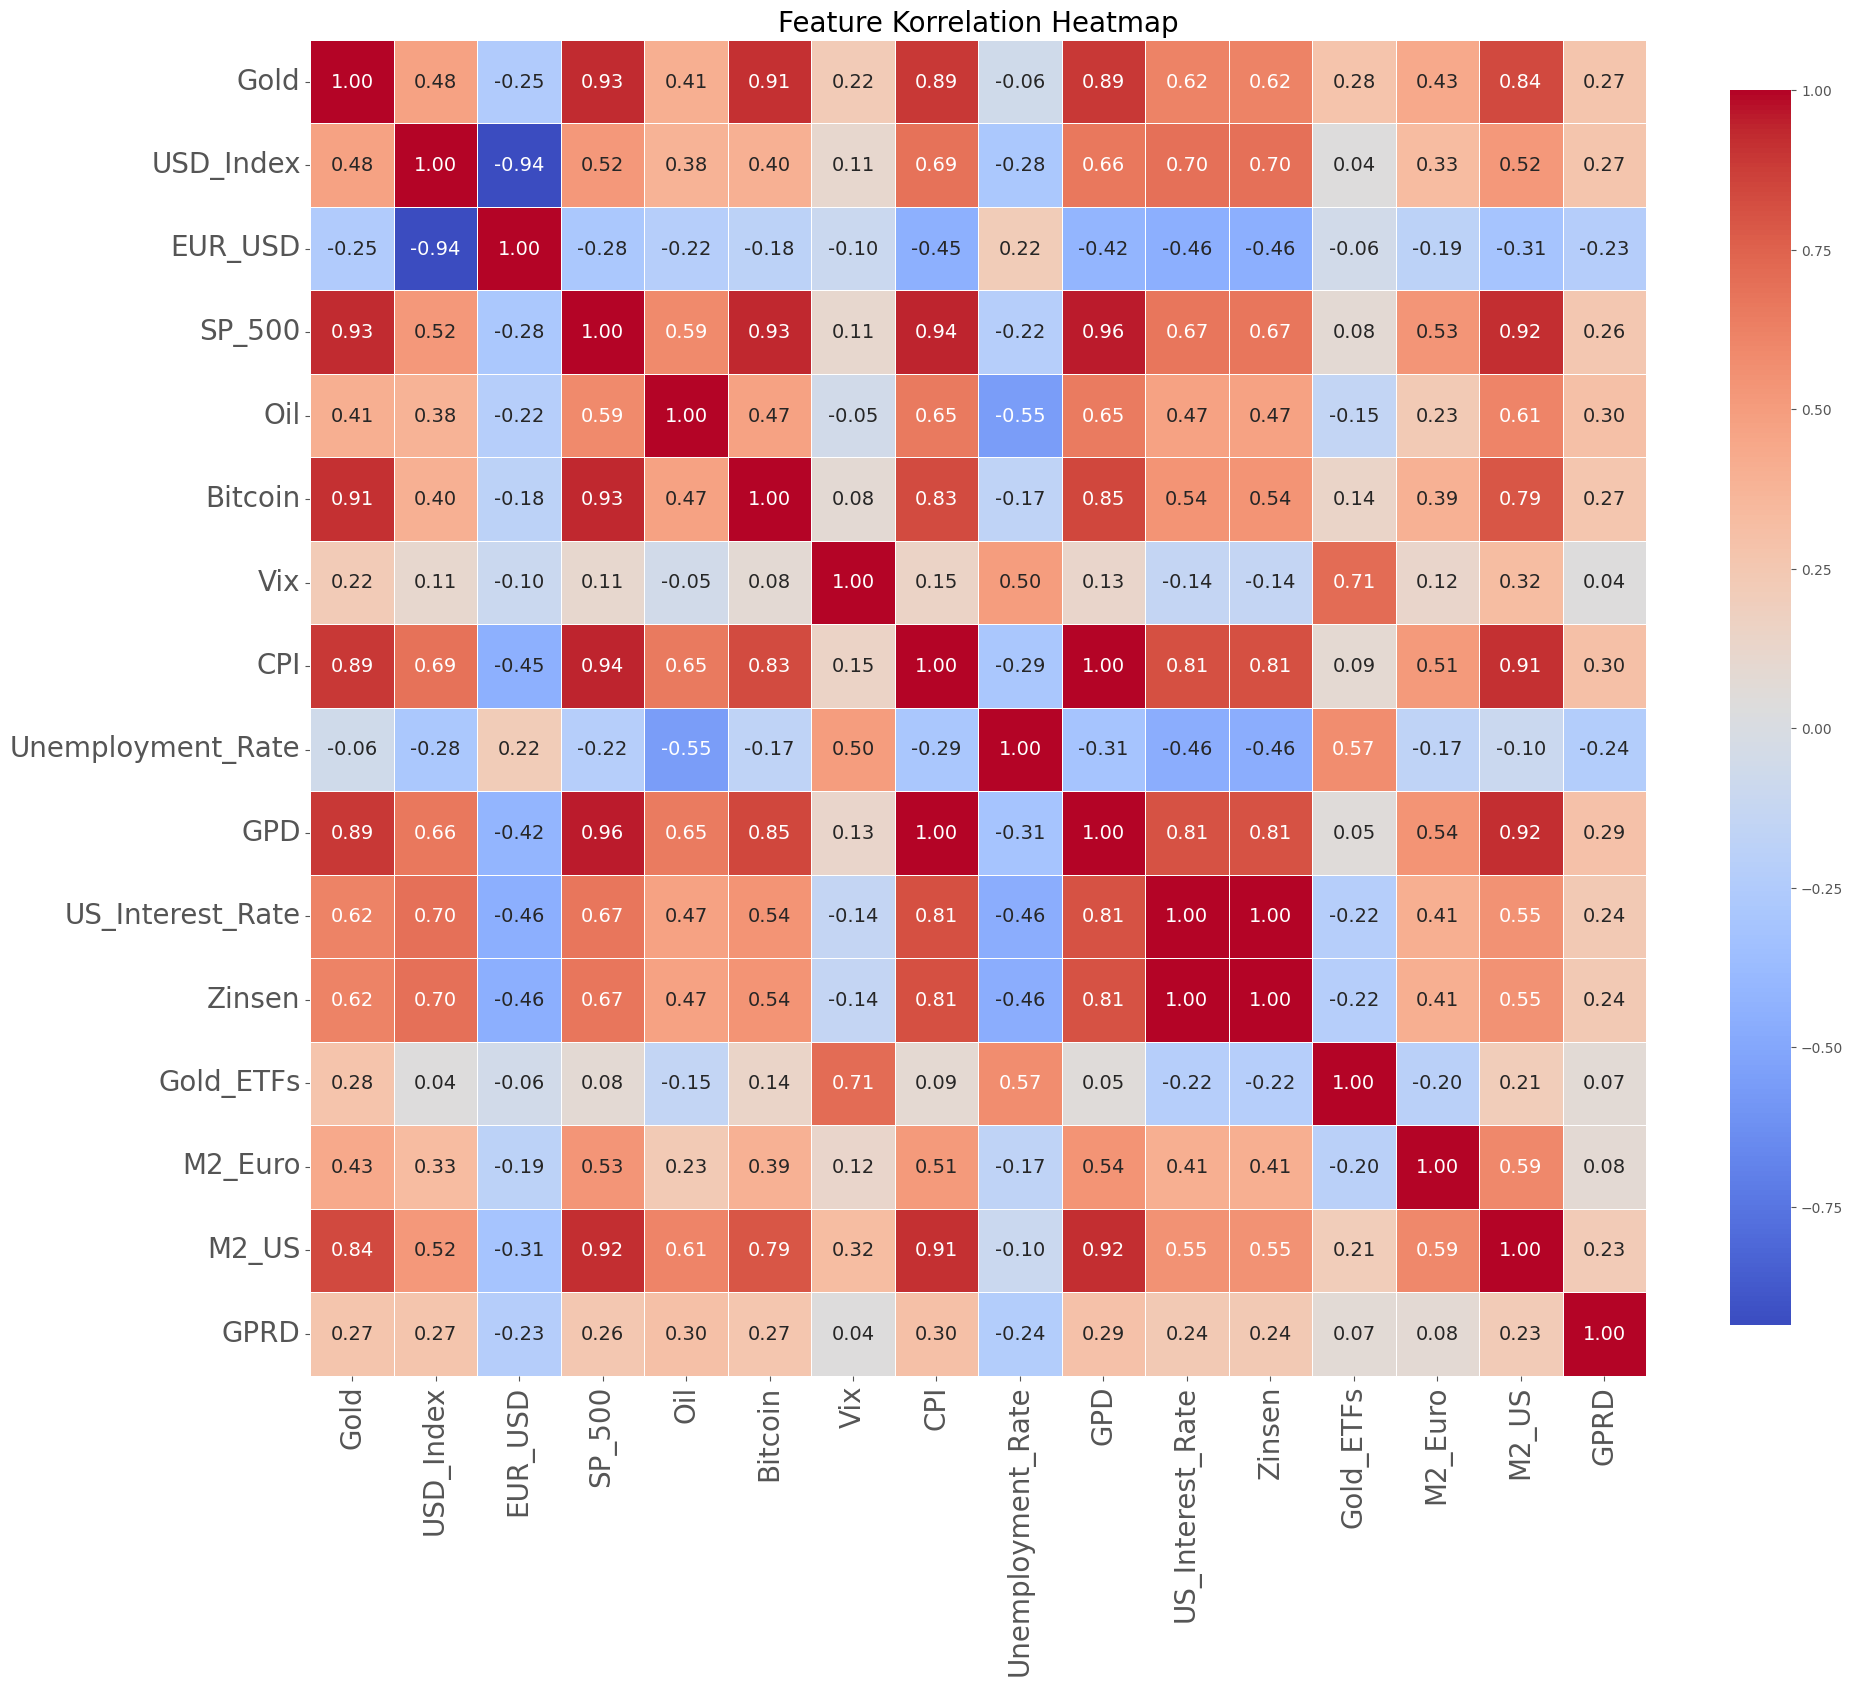

In [73]:
# Calculate matrix (non-stationary)
corr_matrix = df.corr()

# Plotting
plt.figure(figsize=(20,25))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',annot_kws={"size": 14}, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Feature Korrelation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

### Detecting Outliers (If Present)

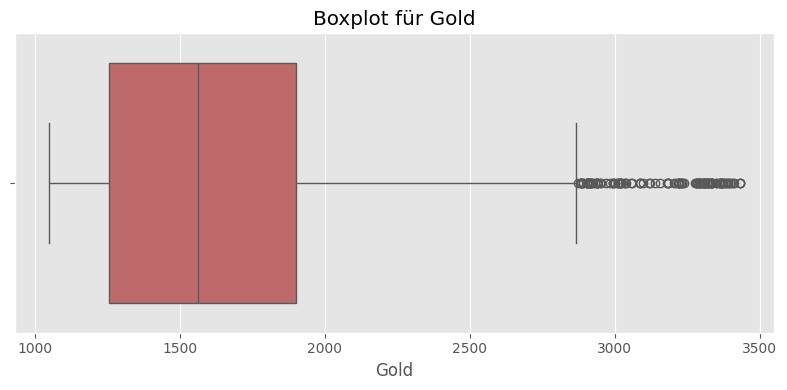

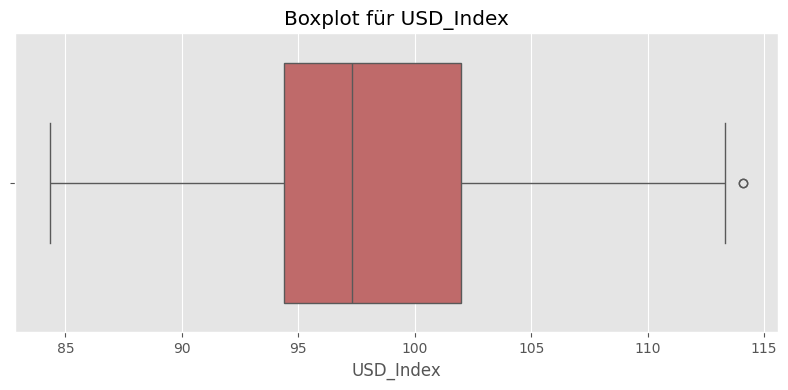

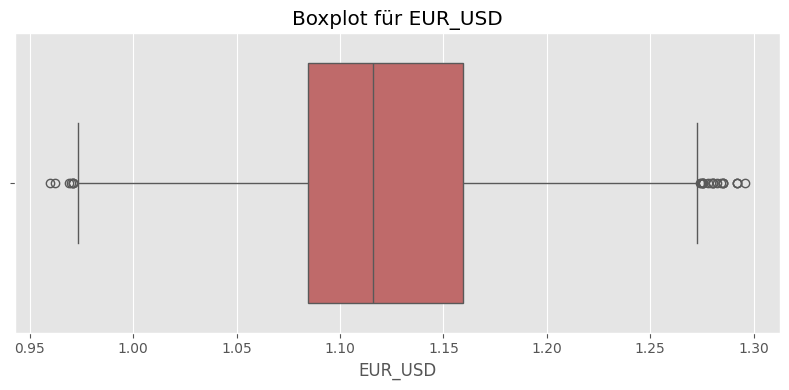

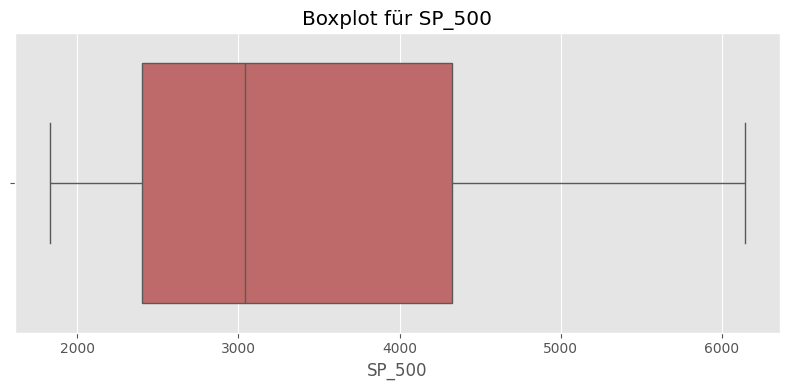

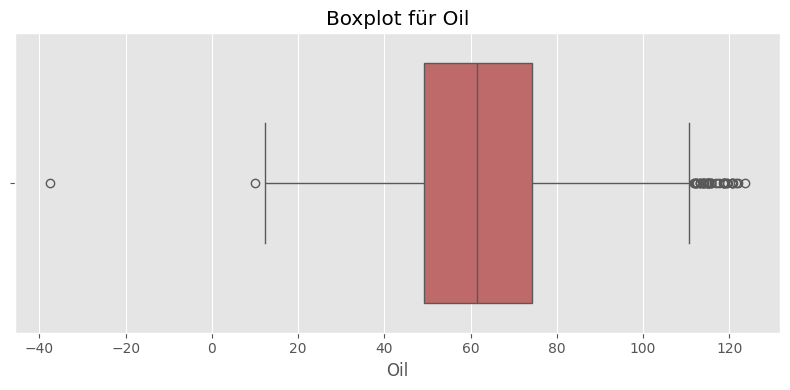

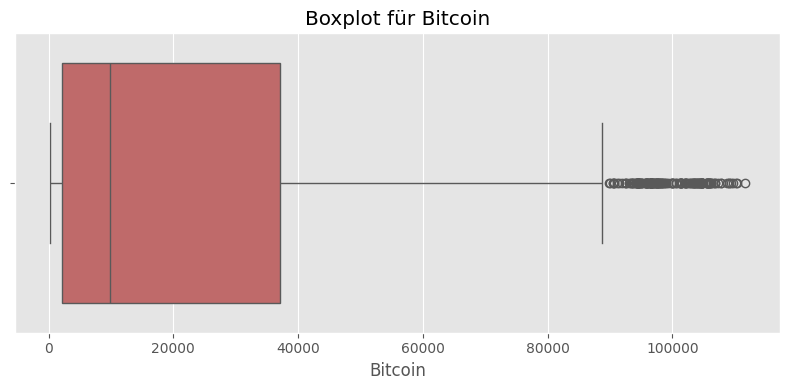

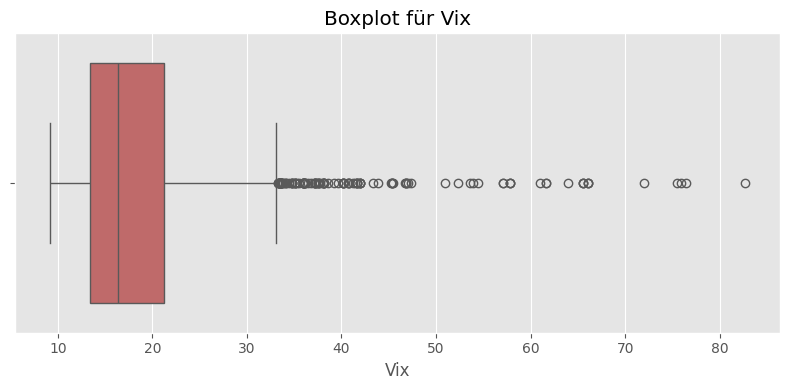

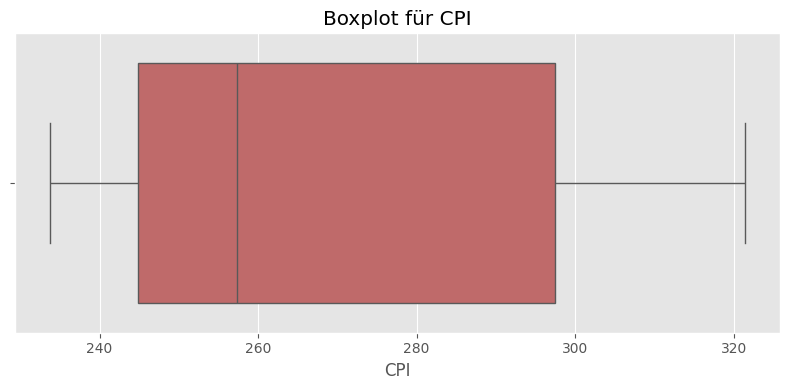

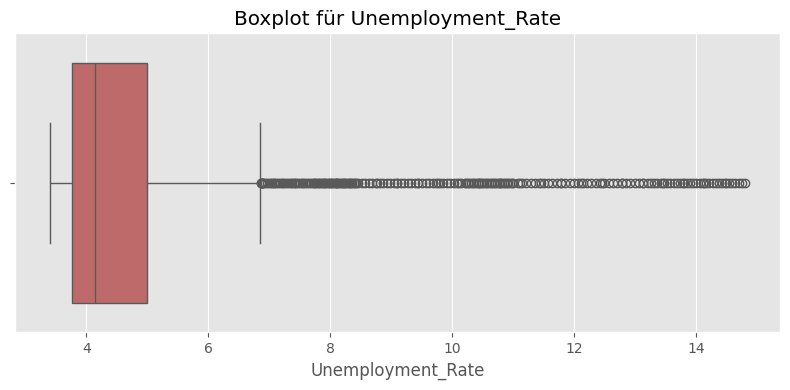

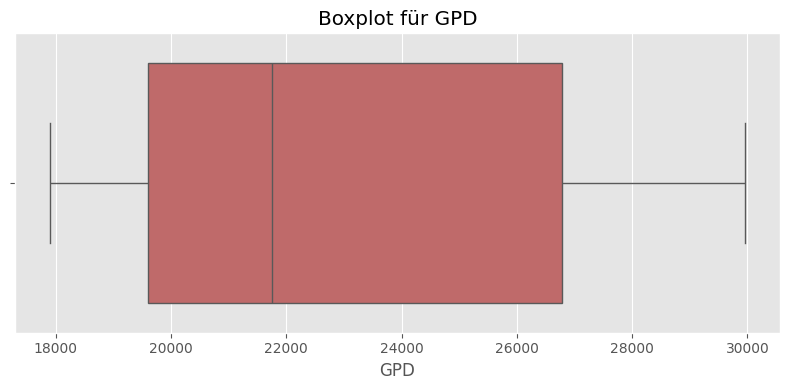

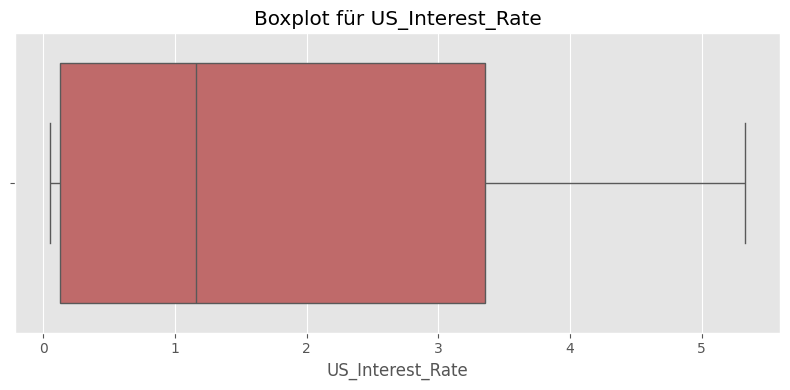

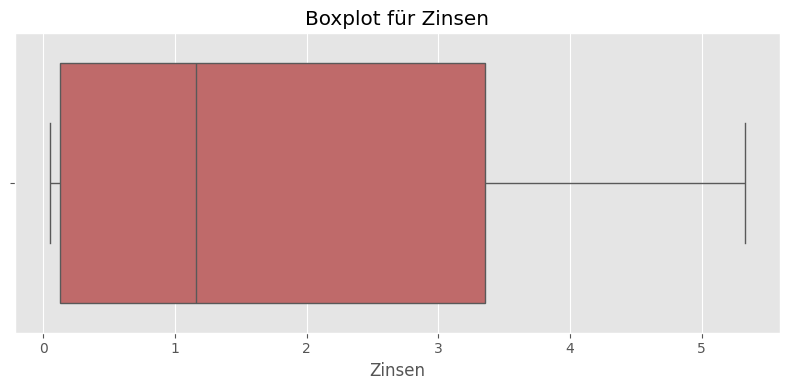

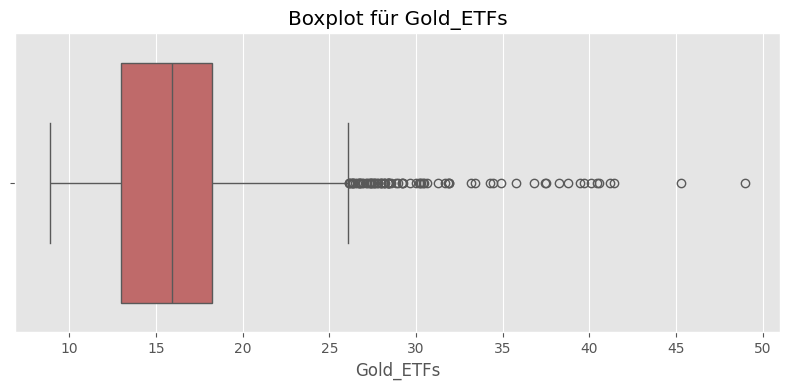

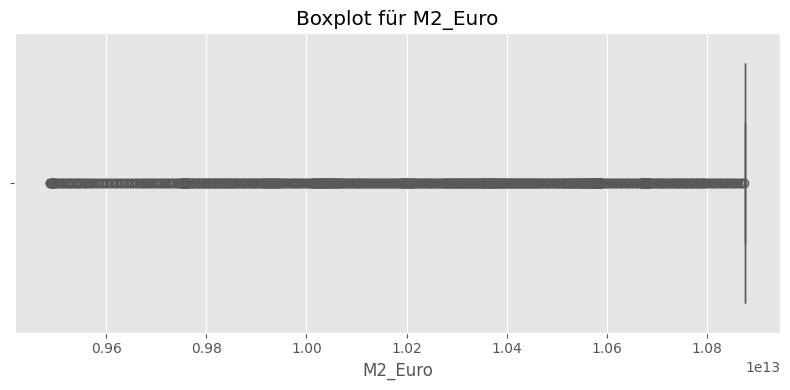

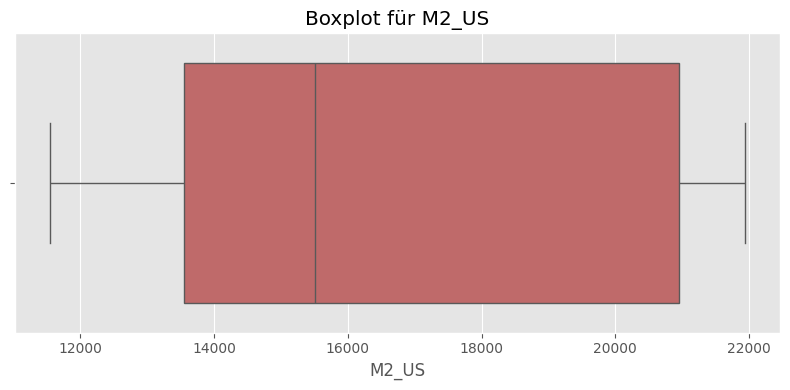

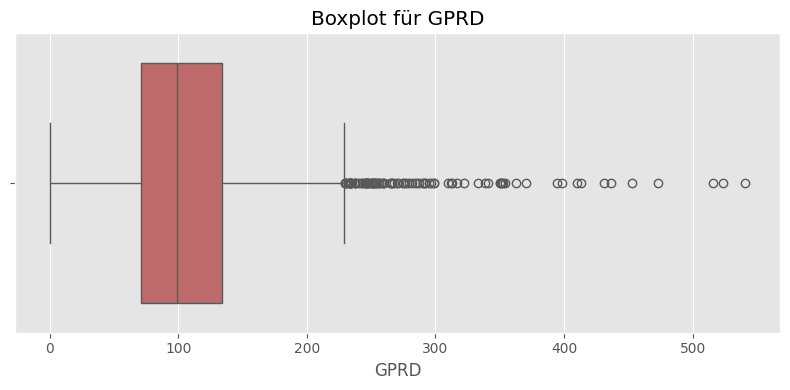

In [74]:
for feature in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature], color='indianred')
    plt.title(f"Boxplot für {feature}")
    plt.tight_layout()
    plt.show()

### Decompostion Plot

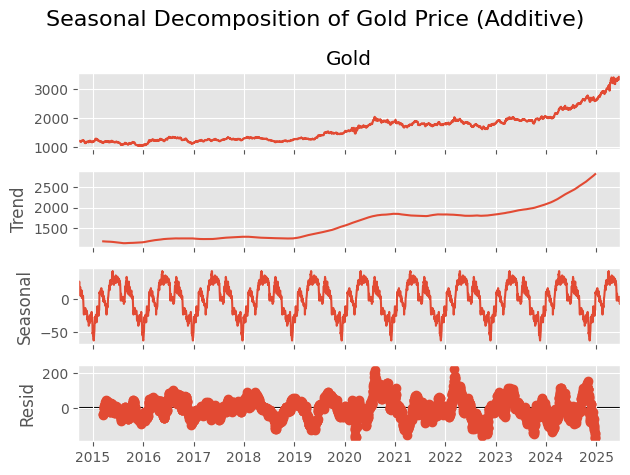

In [75]:
gold = df['Gold']
decomposition = seasonal_decompose(gold, model='additive', period=360)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Gold Price (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

### ACF and PACF Plots 

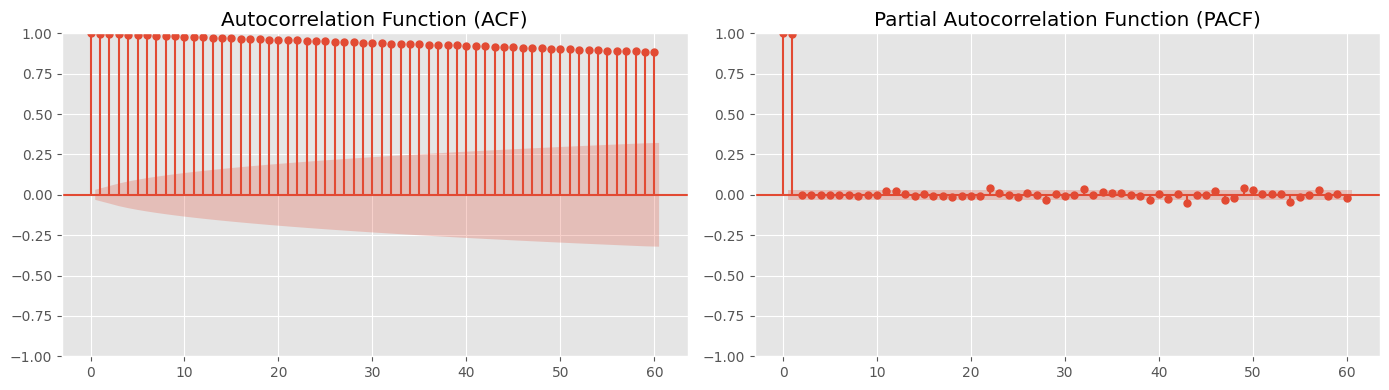

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(gold.dropna(), lags=60, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(gold.dropna(), lags=60, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()